In [65]:
%pip install pandas matplotlib

8844.88s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [92]:
test_filename = os.path.join(os.getcwd(), 'ds03/assets/Test_knight.csv')
test_df = pd.read_csv(test_filename)
train_filename = os.path.join(os.getcwd(), 'ds03/assets/Train_knight.csv')
train_df = pd.read_csv(train_filename)
train_df.set_index('knight')
train_df.describe()

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Recovery,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.097661,19.115025,91.772362,650.989447,0.096415,0.103716,0.089318,0.049001,0.180104,0.062618,...,16.239711,25.521558,107.093794,873.852010,0.132790,0.256784,0.276759,0.115806,0.288324,0.083987
std,3.422475,4.155107,23.561861,339.008193,0.013605,0.051021,0.079026,0.037671,0.026528,0.006633,...,4.653383,5.986852,32.418532,537.413359,0.022889,0.160271,0.215459,0.065403,0.057770,0.018468
min,6.981000,9.710000,43.790000,143.500000,0.065760,0.023440,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.742500,16.172500,75.467500,424.200000,0.086012,0.064605,0.029500,0.020362,0.161600,0.057710,...,13.060000,21.042500,84.377500,518.900000,0.116650,0.147325,0.116475,0.065320,0.250125,0.071887
50%,13.375000,18.700000,86.890000,552.600000,0.095895,0.094120,0.064315,0.034190,0.178800,0.061360,...,15.050000,25.245000,98.135000,698.750000,0.131400,0.211850,0.229800,0.102800,0.281350,0.079870
75%,16.027500,21.537500,105.550000,798.550000,0.106100,0.130475,0.132375,0.074670,0.194475,0.066188,...,19.087500,29.312500,127.050000,1092.250000,0.146650,0.341600,0.387550,0.162225,0.317250,0.092162
max,28.110000,39.280000,188.500000,2501.000000,0.139800,0.311400,0.426400,0.182300,0.304000,0.092960,...,36.040000,44.870000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.488200,0.207500


In [76]:
df = train_df.copy()
df = df.drop(columns=['knight'])
cor_mtx = df.corr()
cor_flt = cor_mtx[(abs(cor_mtx) > 0.7)]
cor_flt

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Recovery,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping
Sensitivity,1.000000,NaN,0.997842,0.986120,NaN,NaN,NaN,0.816778,NaN,NaN,...,0.966842,NaN,0.959444,0.941086,NaN,NaN,NaN,0.726129,NaN,NaN
Hability,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.903324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Strength,0.997842,NaN,1.000000,0.984738,NaN,NaN,NaN,0.845548,NaN,NaN,...,0.968426,NaN,0.966410,0.943184,NaN,NaN,NaN,0.754976,NaN,NaN
Power,0.986120,NaN,0.984738,1.000000,NaN,NaN,NaN,0.811245,NaN,NaN,...,0.956244,NaN,0.949234,0.957344,NaN,NaN,NaN,NaN,NaN,NaN
Agility,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.789491,NaN,NaN,NaN,NaN,NaN
Dexterity,NaN,NaN,NaN,NaN,NaN,1.000000,0.881299,0.833358,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.868827,0.824416,0.830514,NaN,NaN
Awareness,NaN,NaN,NaN,NaN,NaN,0.881299,1.000000,0.909704,NaN,NaN,...,NaN,NaN,0.724532,NaN,NaN,0.744397,0.886168,0.853861,NaN,NaN
Prescience,0.816778,NaN,0.845548,0.811245,NaN,0.833358,0.909704,1.000000,NaN,NaN,...,0.838018,NaN,0.861213,0.818620,NaN,NaN,0.739748,0.906920,NaN,NaN
Reactivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.703485,NaN
Midi-chlorien,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.765183


In [ ]:
df = train_df
jedi_df = df[df['knight'] == 'Jedi']
sith_df = df[df['knight'] == 'Sith']
n_cols = 2
n_rows = 2
plt.figure(figsize=(10, 30))

def subplot_scatter(xlabel: str, ylabel: str, idx: int):
    plt.subplot(n_rows, n_cols, idx)
    plt.scatter(jedi_df[xlabel], jedi_df[ylabel], alpha=0.5, s=10, c='lightcoral')
    plt.scatter(sith_df[xlabel], sith_df[ylabel], alpha=0.5, s=10, c='royalblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

<Figure size 4000x3000 with 0 Axes>

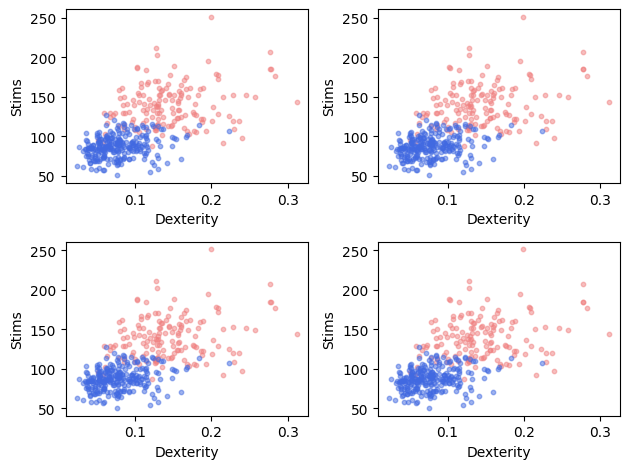

In [118]:
subplot_scatter('Dexterity', 'Stims', 1)
subplot_scatter('Dexterity', 'Stims', 2)
subplot_scatter('Dexterity', 'Stims', 3)
subplot_scatter('Dexterity', 'Stims', 4)
plt.tight_layout()
plt.show()